In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import gc
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
from sklearn import metrics
import scipy.stats as stats

from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

plt.style.use('seaborn')
sns.set(font_scale=2)
pd.set_option('display.max_columns', 500)



In [2]:
def analysis(col, tops = 10):
    temp = train[col].value_counts()
    temp = temp.iloc[:tops].index
    #temp = train.index
    temp_df = train[train[col].isin(temp)]
#     prob = temp_df[col].value_counts(normalize=True)
#     draw = np.random.choice(prob.index, p=prob, size=len(temp_df))
#     output = pd.Series(draw).value_counts(normalize=True).rename('simulated')
#     zeros = set(temp_df[col].dropna().unique()).difference(set(output.index))
#     output = output.append(pd.Series([0 for i in zeros], index = zeros)) / (temp_df[col].value_counts())
    temp_df['shuffle'] = temp_df['HasDetections'].sample(replace=False, n=len(temp_df)).reset_index(drop=True)
    output = temp_df[temp_df['shuffle'] == 1][col].value_counts() / temp_df[col].value_counts()
    pd.DataFrame({'train_data': temp_df[temp_df['HasDetections'] == 1][col].value_counts()/ temp_df[col].value_counts(),
                         'random_data': output}).plot(kind = 'bar', figsize=(20,10))
    plt.title('Percent of Has detections by {} (most of the catogaries)'.format(col))
    
    display(pd.DataFrame({'train_data': temp_df[temp_df['HasDetections'] == 1][col].value_counts()/ temp_df[col].value_counts(),
                         'random_data': output}))
    return stats.ks_2samp(temp_df[temp_df['HasDetections'] == 1][col].value_counts(normalize = True),
                output)




#stats.chi2_contingency([temp_df.groupby(col).HasDetections.mean(),
#                temp_df.groupby(col).random_data.mean()])


In [3]:
COLS = [
    'HasDetections',
    'AVProductStatesIdentifier','AVProductsInstalled', 'AVProductsEnabled'
]

In [4]:
train = pd.read_csv("train.csv", sep=',', engine='c', usecols=COLS)

In [5]:
train.head()

,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasDetections
0,53447.0,1.0,1.0,0
1,53447.0,1.0,1.0,0
2,53447.0,1.0,1.0,0
3,53447.0,1.0,1.0,1
4,53447.0,1.0,1.0,1


In [6]:
#General analysis

In [7]:
#1.1 AVProductStatesIdentifier

#Top 20 categories detection

Text(0, 0.5, 'count')

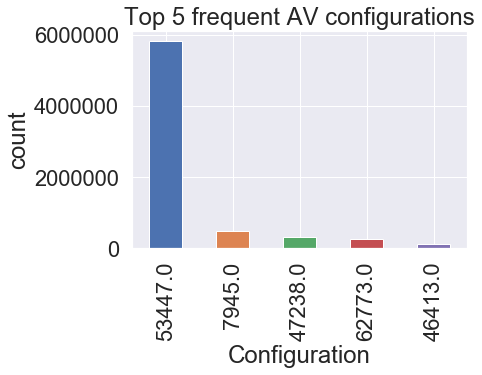

In [8]:
train[COLS[1]].value_counts().iloc[:5].plot(kind='bar', title= 'Top 5 frequent AV configurations')
plt.xlabel("Configuration")
plt.ylabel("count")

Text(0, 0.5, 'proportion')

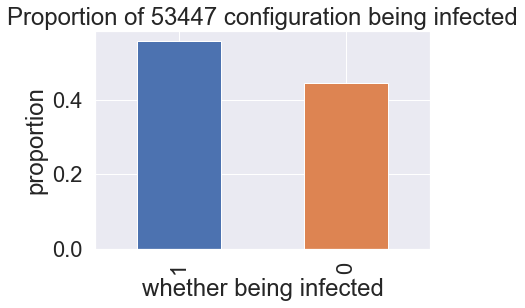

In [9]:
train[train[COLS[1]]==53447.0].HasDetections.value_counts(normalize=True).plot("bar", title='Proportion of 53447 configuration being infected')
plt.xlabel("whether being infected")
plt.ylabel("proportion")

,train_data,random_data
2558.0,0.168525,0.474461
3371.0,0.338305,0.477813
4786.0,0.536552,0.495636
5439.0,0.304536,0.482259
6407.0,0.285132,0.479037
6465.0,0.262006,0.471441
6630.0,0.282516,0.481675
7073.0,0.284089,0.495114
7681.0,0.252316,0.475068
7945.0,0.348334,0.479703


Ks_2sampResult(statistic=0.99, pvalue=1.2251433537012255e-44)

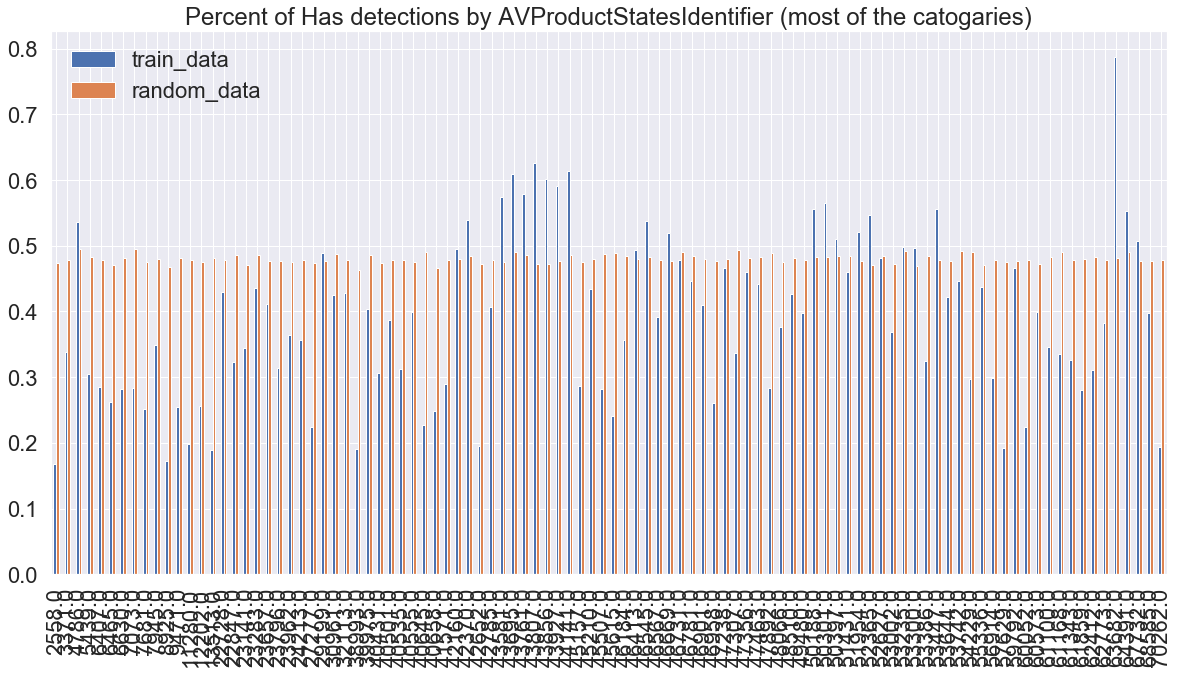

In [10]:
analysis(COLS[1], 100)

In [11]:
# hypothesis: Different Antivirius product will have different performance over the virius detection

In [12]:
train[COLS[2]].value_counts()

1.0    6208893
2.0    2459008
3.0     208103
4.0       8757
5.0        471
6.0         28
7.0          1
0.0          1
Name: AVProductsInstalled, dtype: int64

In [13]:
# hypothesis: Different Antivirius product installed will have different performance over the virius detection

,train_data,random_data
1.0,0.548581,0.498079
2.0,0.396906,0.497881
3.0,0.291596,0.497114


Ks_2sampResult(statistic=0.6666666666666666, pvalue=0.3197243332709645)

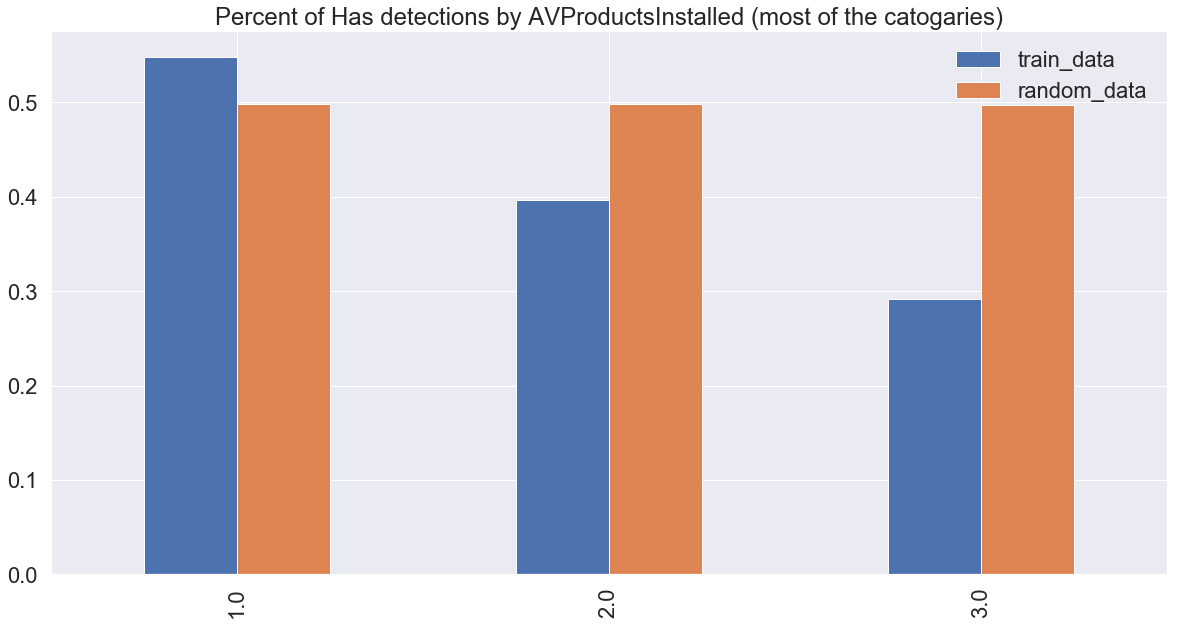

In [14]:
analysis(COLS[2], 3)

In [15]:
#Need deep analysis

In [16]:
# hypothesis: Different Antivirius product installed will have different performance over the virius detection

In [27]:
train[COLS[3]].value_counts()

1.0    8654101
2.0     198652
0.0      25958
3.0       6075
4.0        453
5.0         23
Name: AVProductsEnabled, dtype: int64

,train_data,random_data
1.0,0.504636,0.496984
2.0,0.336422,0.497433


Ks_2sampResult(statistic=0.5, pvalue=0.8438198245415606)

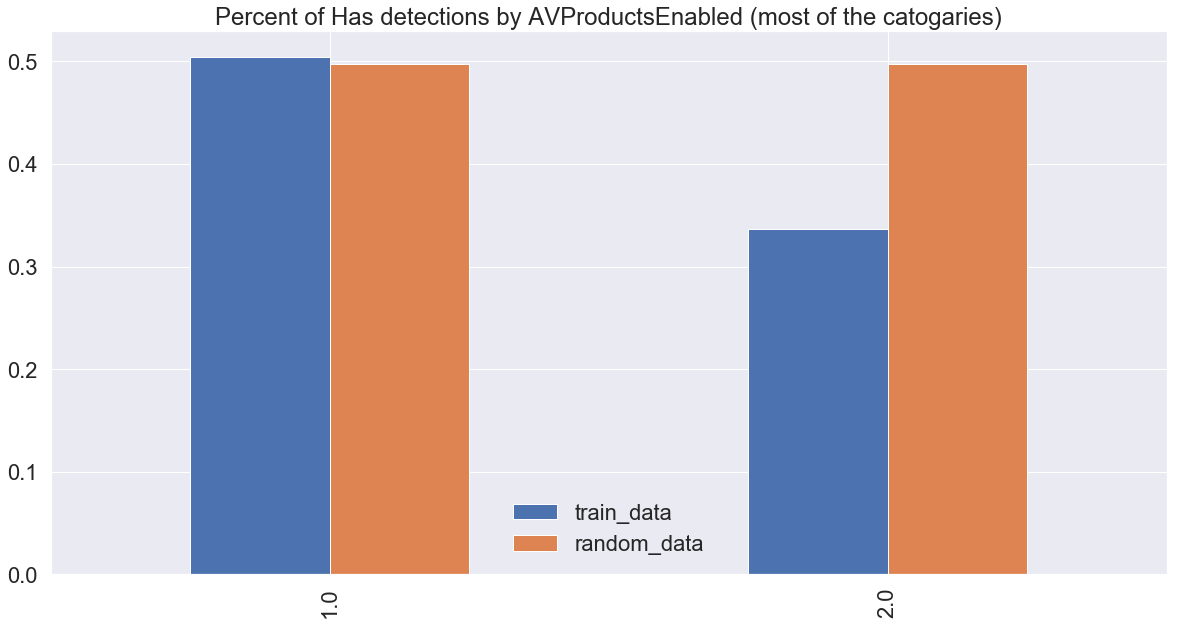

In [17]:
analysis(COLS[3], 2)

In [18]:
#Need deep analysis

In [19]:
# trial w/ random forest

In [20]:
def skl(col):
    nominal_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preproc = ColumnTransformer(transformers=[('onehot', nominal_transformer, col)],\
                                          remainder='drop')
    clf = RandomForestClassifier(n_estimators=7, max_depth=60)
    pl = Pipeline(steps=[('preprocessor', preproc),
                    ('clf', clf)
                    ])
    return pl

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train.dropna().drop('HasDetections',axis = 1)\
                                                    , train.dropna()['HasDetections'], test_size=0.25)
N = len(y_test)
y_random = y_test.sample(replace=False, frac = 1)

In [22]:
output = pd.DataFrame(columns = ['Observation accuracy', 'Random_Data accuracy'], index = COLS[1:])
for i in COLS[1:]:
    pl = skl([i])
    pl.fit(X_train, y_train)
    pred_score = pl.score(X_test, y_test)
    rand_score = pl.score(X_test, y_random)
    output.loc[i, 'Observation accuracy'] = pred_score
    output.loc[i, 'Random_Data accuracy'] = rand_score
pl = skl(COLS[1:])
pl.fit(X_train, y_train)
pred_score = pl.score(X_test, y_test)
rand_score = pl.score(X_test, y_random)
output.loc['combined', 'Observation accuracy'] = pred_score
output.loc['combined', 'Random_Data accuracy'] = rand_score

In [23]:
output

,Observation accuracy,Random_Data accuracy
AVProductStatesIdentifier,0.577934,0.500461
AVProductsInstalled,0.568239,0.500398
AVProductsEnabled,0.509382,0.500699
combined,0.578303,0.500456


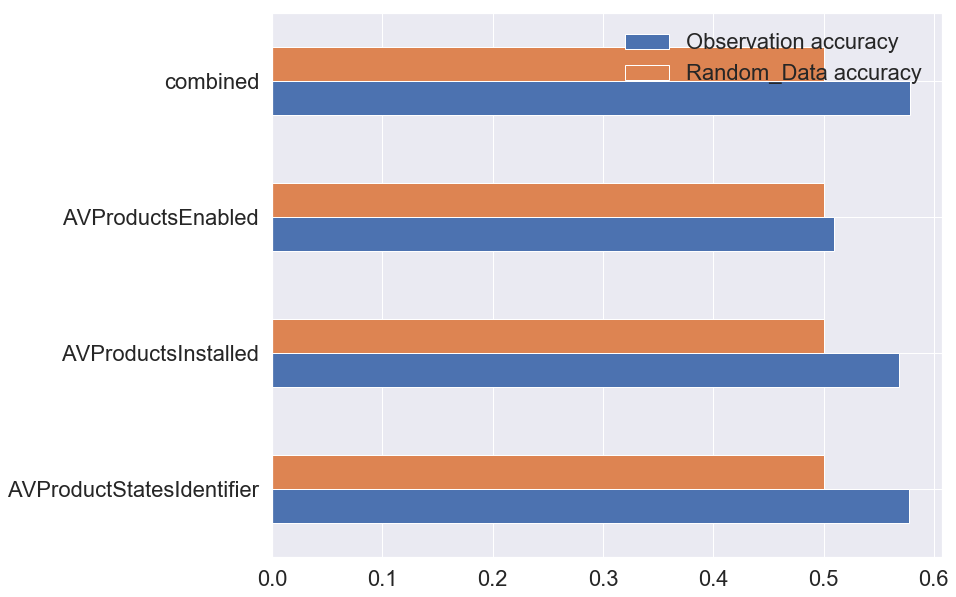

In [30]:
output.plot(kind = 'barh', ylim = (0.45, 0.65), figsize=[12,10])

In [25]:
#Conclusion, when using random forest clustering, 'AVProductStatesIdentifier' will dominate the performance
#of prediction, compare the comparison with random data, 'AVProductStatesIdentifier' have a significant imporvement
#in identifying malware.